In [1]:
import numpy as np 
from sklearn.manifold import TSNE as t_sne
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import LocallyLinearEmbedding as lle
import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
%matplotlib inline 

from ipywidgets import *
import pickle
import time

from plot_functions import *

# Section III B-1: Applying the Algorithms, LLE

In this section, an ordinary Swiss roll with 1000 data points and noise set to 0.01 is used. The effect of the  hyperparameters for LLE are explored. 

## Importing and plotting the data set: 

In [2]:
X, color=make_swiss_roll(1000, noise=0.01)

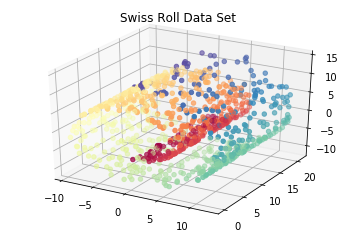

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll Data Set")
plt.savefig('dataset.pdf')
plt.show()

## Applying LLE

We want to apply the LLE algorithm, and play around with the hyperparameters.

# Analysing the effect of number of nearest neighbours

In [5]:

n_neighbors=np.arange(3,80,2)
n_components=2

create=True
if create: 
    n_Y=[]
    n_times=np.zeros(len(n_neighbors))
    n_reconstruction_error=np.zeros(len(n_neighbors))
    for i, n in enumerate(n_neighbors):
        LLE=lle(n, n_components,eigen_solver='auto')
        start_time=time.time()
        n_Y.append(LLE.fit_transform(X))
        n_times[i]= time.time()-start_time
        n_reconstruction_error[i]=LLE.reconstruction_error_ 
    pickle.dump( n_Y, open("n_Y_lle.pkl", "wb")) 
    pickle.dump(color, open("color.pkl","wb"))
    pickle.dump(n_neighbors, open("n_neighbors.pkl","wb"))
    pickle.dump(n_times, open("n_times.pkl","wb"))
    pickle.dump(n_reconstruction_error, open("n_reconstruction_error.pkl","wb"))
else: 
    n_Y= pickle.load(open("n_Y_lle.pkl.pkl", "rb"))
    color=pickle.load(open("color.pkl", "rb"))
    n_neighbors=pickle.load(open("n_neighbors.pkl", "rb"))
    n_times=pickle.load(open("n_times.pkl", "rb"))
    n_reconstruction_error=pickle.load(open("n_reconstruction_error.pkl", "rb"))

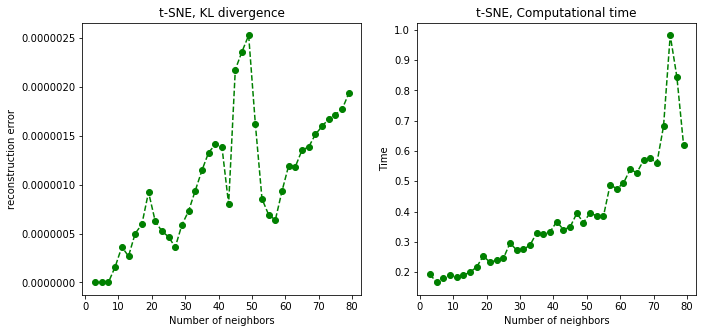

In [6]:
plot_error_and_time(n_neighbors, n_reconstruction_error,n_times,variable='Number of neighbors', filename=False, error_type='reconstruction error')

In [7]:
interactive(plot_inter, Z=fixed(n_Y), color=fixed(color),var=fixed(n_neighbors),variable=fixed('n_neighbors'), transformation=fixed('LLE'),i=widgets.IntSlider(min=0,max=len(n_neighbors)-1,step=1, value=0))



/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# Analysing the effect of reg

In [8]:

reg=np.logspace(-14,-0.01,30) 
n_components=2
neighbors=12
create=True
if create: 
    r_Y=[]
    r_times=np.zeros(len(reg))
    r_reconstruction_error=np.zeros(len(reg))
   
    for i, r in enumerate(reg):
        LLE=lle(neighbors, n_components,reg=r,eigen_solver='auto')
        start_time=time.time()
        r_Y.append(LLE.fit_transform(X))
        r_times[i]= time.time()-start_time
        r_reconstruction_error[i]=LLE.reconstruction_error_ 
    pickle.dump( r_Y, open("r_Y_lle.pkl", "wb")) 
    pickle.dump(color, open("color.pkl","wb"))
    pickle.dump(reg, open("reg.pkl","wb"))
    pickle.dump(r_times, open("r_times.pkl","wb"))
    pickle.dump(r_reconstruction_error, open("r_reconstruction_error.pkl","wb"))
else: 
    r_Y= pickle.load(open("r_Y_lle.pkl.pkl", "rb"))
    color=pickle.load(open("color.pkl", "rb"))
    reg=pickle.load(open("reg.pkl", "rb"))
    r_times=pickle.load(open("r_times.pkl", "rb"))
    r_reconstruction_error=pickle.load(open("r_reconstruction_error.pkl", "rb"))

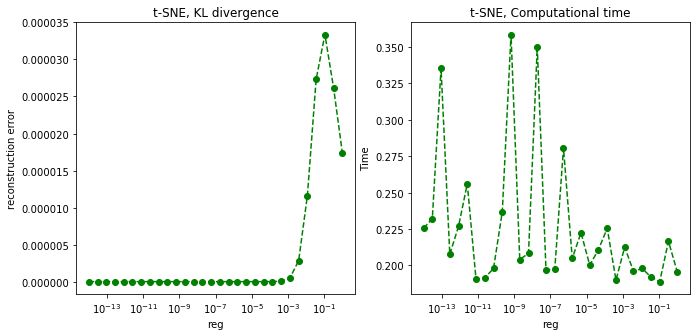

In [9]:
plot_error_and_time(reg, r_reconstruction_error,r_times,variable="reg", filename=False, error_type='reconstruction error')

In [10]:
interactive(plot_inter, Z=fixed(r_Y), color=fixed(color),var=fixed(reg),variable=fixed('reg'), transformation=fixed('LLE'),i=widgets.IntSlider(min=0,max=len(reg)-1,step=1, value=0))



/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# Analysing the effect of 